# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from scipy import signal
import math


# Obrazki
if not os.path.exists("jet.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png --no-check-certificate
if not os.path.exists("kw.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png --no-check-certificate
if not os.path.exists("moon.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/moon.png --no-check-certificate
if not os.path.exists("lenaSzum.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaSzum.png --no-check-certificate
if not os.path.exists("lena.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lena.png --no-check-certificate
if not os.path.exists("plansza.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/plansza.png --no-check-certificate


--2021-04-20 08:27:29--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240502 (235K) [image/png]
Saving to: ‘jet.png’

jet.png             100%[===================>] 234.87K  --.-KB/s    in 0.03s   

2021-04-20 08:27:30 (7.47 MB/s) - ‘jet.png’ saved [240502/240502]

--2021-04-20 08:27:30--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2221 (2.2K) [image/png]
Saving to: ‘kw.

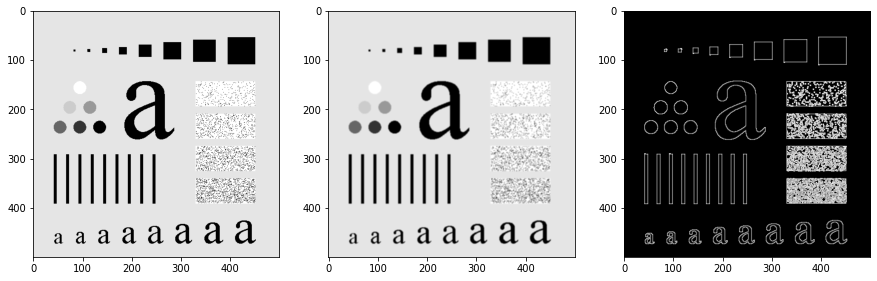

In [2]:
img = cv2.imread('plansza.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(img,-1,kernel)

fig, axes = plt.subplots(1,3, figsize=(15, 15))
axes[0].imshow(img, 'gray')
axes[1].imshow(dst, 'gray')
axes[2].imshow(abs(dst-img), 'gray', vmin=0, vmax=255)
plt.show()

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

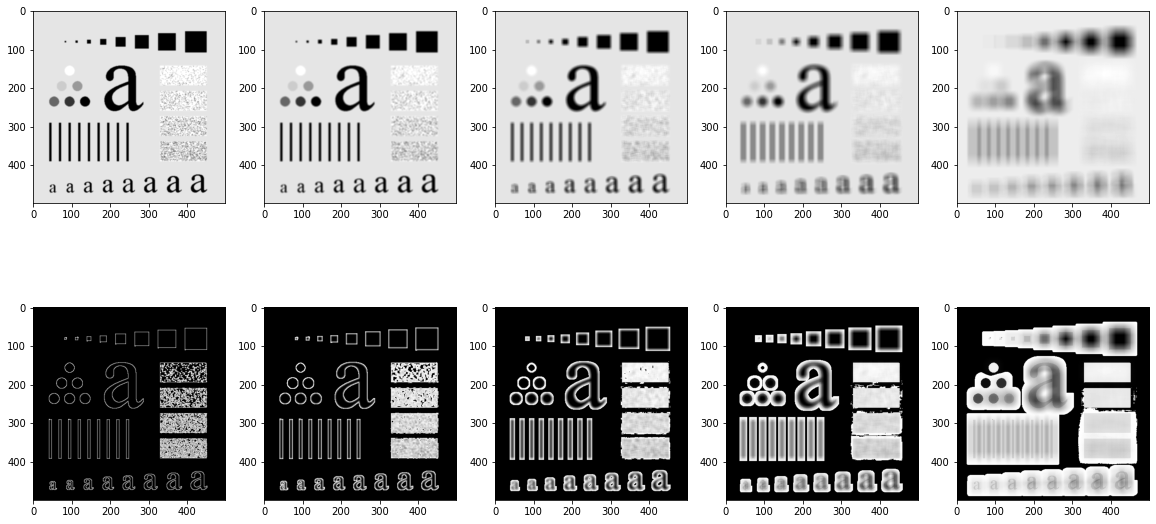

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, k in enumerate([3,5,9,15,35]):
    kernel = np.ones((k,k),np.float32)/k**2
    dst = cv2.filter2D(img,-1,kernel)
    diff = abs(dst-img)
    axes[0][i].imshow(dst, 'gray')
    axes[1][i].imshow(diff, 'gray')
plt.show()

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

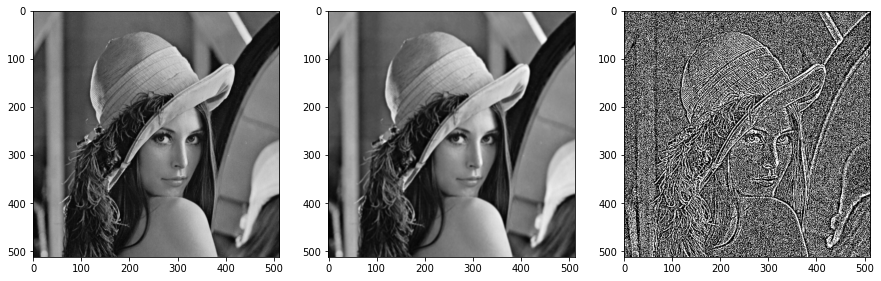

In [4]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(img, -1, kernel)

fig, axes = plt.subplots(1,3, figsize=(15, 15))
axes[0].imshow(img, 'gray')
axes[1].imshow(dst, 'gray')
axes[2].imshow(abs(dst-img), 'gray', vmin=0, vmax=255)
plt.show()


7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

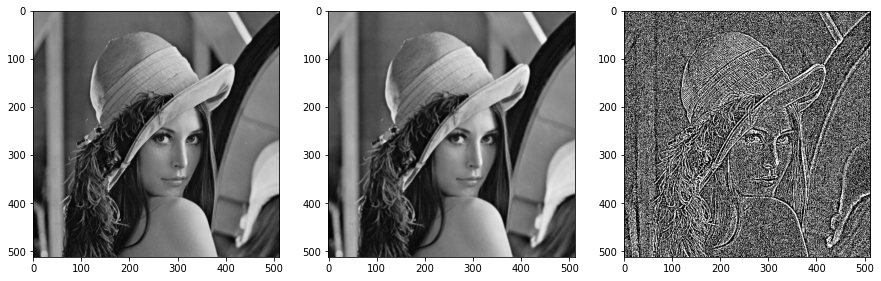

In [5]:
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
kernel = kernel/sum(sum(kernel))
dst = cv2.filter2D(img, -1, kernel)

fig, axes = plt.subplots(1,3, figsize=(15, 15))
axes[0].imshow(img, 'gray')
axes[1].imshow(dst, 'gray')
axes[2].imshow(abs(dst-img), 'gray', vmin=0, vmax=255)
plt.show()


8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


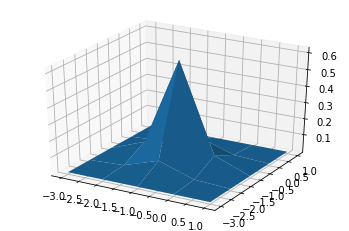

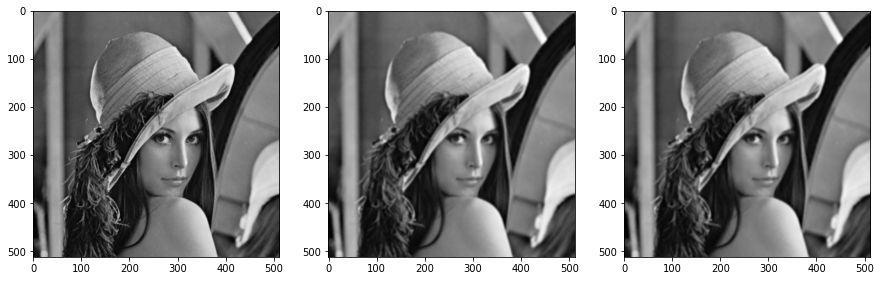

In [6]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()
    
gaus = fgaussian(5,0.5)
mesh(gaus,5)
dst1 = cv2.filter2D(img, -1, gaus)

gaus = fgaussian(5,5)
dst2 = cv2.filter2D(img, -1, fgaussian(5,5))

dst3 = cv2.GaussianBlur(img, (5,5), 5, 5)

fig, axes = plt.subplots(1,3, figsize=(15, 15))
axes[0].imshow(dst1, 'gray')
axes[1].imshow(dst2, 'gray')
axes[2].imshow(dst3, 'gray')
plt.show()

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


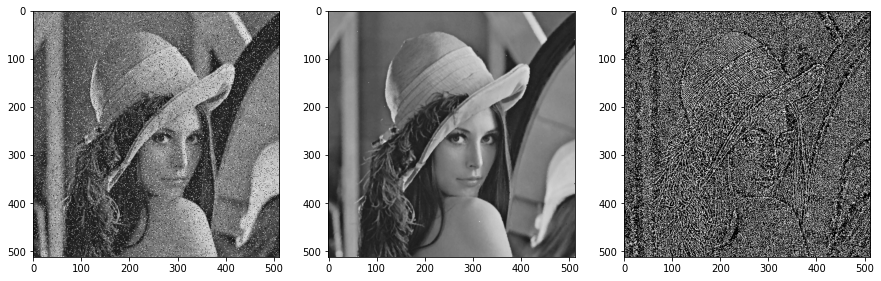

In [7]:
img = cv2.imread('lenaSzum.png', cv2.IMREAD_GRAYSCALE)
dst = cv2.medianBlur(img, 3)

fig, axes = plt.subplots(1,3, figsize=(15, 15))
axes[0].imshow(img, 'gray')
axes[1].imshow(dst, 'gray')
axes[2].imshow(abs(dst-img), 'gray', vmin=0, vmax=255)
plt.show()


2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

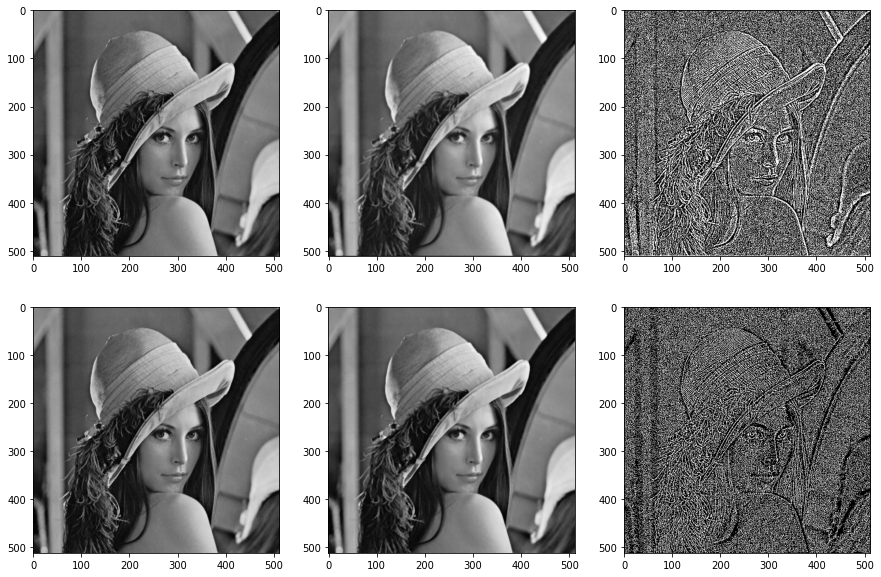

In [8]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('lenaSzum.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3),np.float32)/(3*3)
dst = cv2.filter2D(img,-1,kernel, borderType=cv2.BORDER_CONSTANT)
med = cv2.medianBlur(img,3)

fig, axes = plt.subplots(2,3, figsize=(15, 10))
axes[0][0].imshow(img, 'gray')
axes[0][1].imshow(dst, 'gray')
axes[0][2].imshow(abs(dst-img), 'gray', vmin=0, vmax=255)
axes[1][0].imshow(img, 'gray')
axes[1][1].imshow(med, 'gray')
axes[1][2].imshow(abs(med-img), 'gray', vmin=0, vmax=255)
plt.show()

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

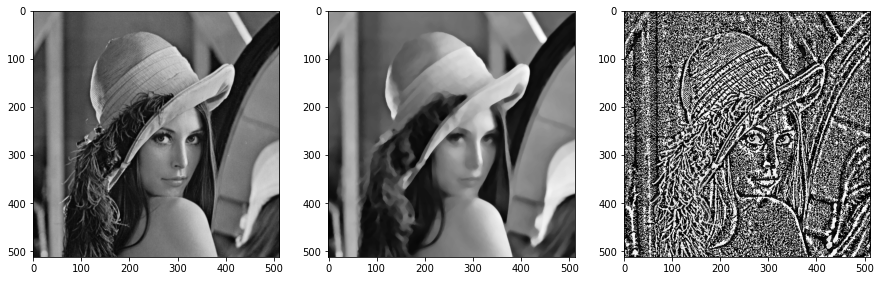

In [9]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

dst = cv2.medianBlur(img, 5)
for i in range(9):
  dst = cv2.medianBlur(dst, 5)

fig, axes = plt.subplots(1,3, figsize=(15, 15))
axes[0].imshow(img, 'gray')
axes[1].imshow(dst, 'gray')
axes[2].imshow(abs(dst-img), 'gray', vmin=0, vmax=255)
plt.show()


## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

128 138
0 21


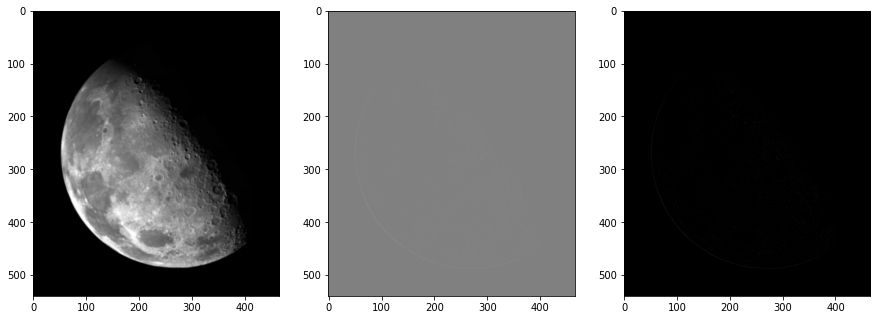

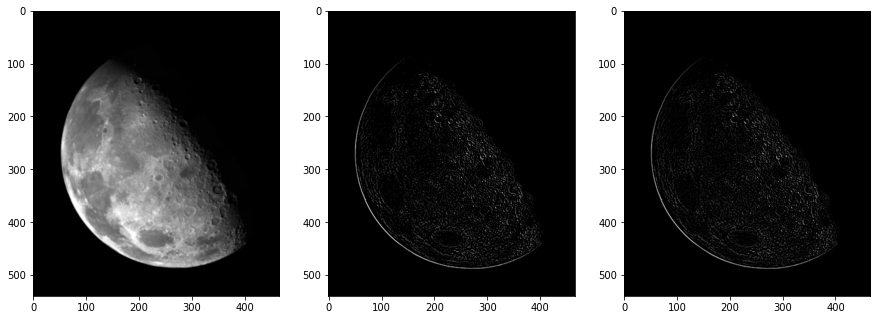

In [10]:
img = cv2.imread('moon.png', cv2.IMREAD_GRAYSCALE)

kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
dst1 = cv2.filter2D(img,-1,kernel/8)
dst1 = dst1 + 128
dst2 = cv2.filter2D(img,-1,kernel/4)
dst2 = abs(dst2)

print(dst1.min(),dst1.max())
print(dst2.min(),dst2.max())

fig, axes = plt.subplots(1,3, figsize=(15, 15))
axes[0].imshow(img, 'gray', vmin=0, vmax=255)
axes[1].imshow(dst1, 'gray', vmin=0, vmax=255)
axes[2].imshow(dst2, 'gray', vmin=0, vmax=255)
plt.show()

fig, axes = plt.subplots(1,3, figsize=(15, 15))
axes[0].imshow(img, 'gray')
axes[1].imshow(dst1, 'gray')
axes[2].imshow(dst2, 'gray')
plt.show()

**Filtr faktycznie pokazuje krawędzie jednak zdjęciach jest określone przez stosunkowo niewielki wartości od 0 do 21 oraz krawędzie są za cienkie by je dostrzec.
Dodatkowo o ile się nie myle korzystając z laplasjanu, maksymalna wartość jaka może pojawić sie to 4x255, a minimalna to -4x255. Dlatego sensowniejsze jest dzielenie przez 8 (a nie 9 jak w poleceniu), ponieważ dzieląc przez 8 oraz dodając 128 otrzymujemy wartości w przedziale [0,255]. Gdy normalizujemy korzystając z abs to wystarczy podzielić przez 4.**

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



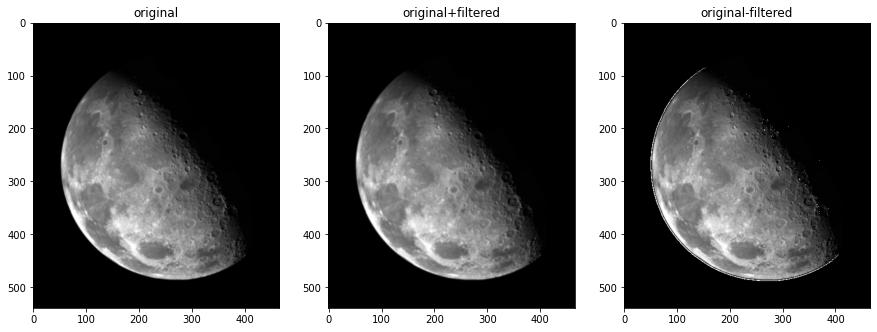

In [11]:
img = cv2.imread('moon.png', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1,3, figsize=(15, 15))
axes[0].imshow(img, 'gray', vmin=0, vmax=255)
axes[0].set_title('original')
axes[1].imshow(img+dst2, 'gray', vmin=0, vmax=255)
axes[1].set_title('original+filtered')
axes[2].imshow(abs(img-dst2), 'gray', vmin=0, vmax=255)
axes[2].set_title('original-filtered')
plt.show()

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

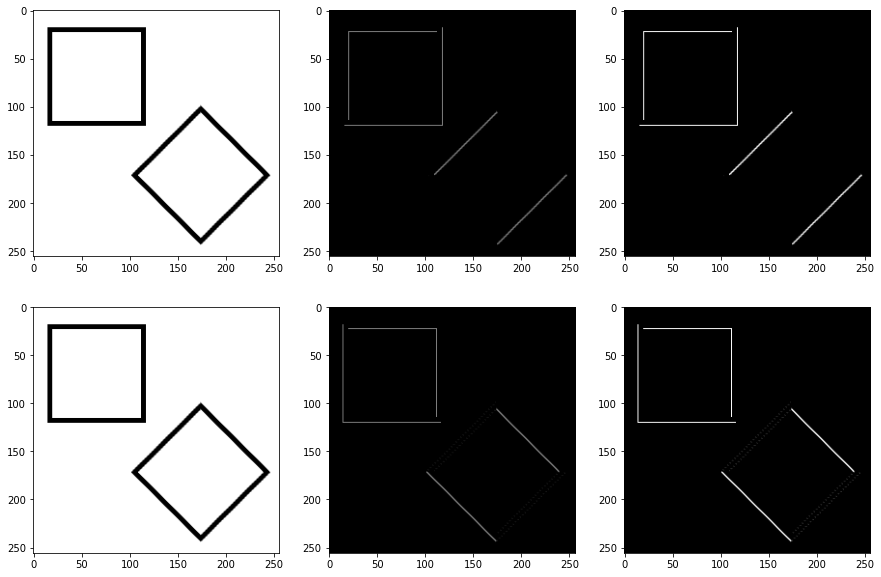

In [12]:
img = cv2.imread('kw.png', cv2.IMREAD_GRAYSCALE)

# Kernel
R1 = np.array([[0,0,0],[-1,0,0],[0,1,0]])
R2 = np.array([[0,0,0],[0,0,-1],[0,1,0]])

# +128 norm 
dst1 = cv2.filter2D(img,-1,R1/2)
dst2 = cv2.filter2D(img,-1,R2/2)
dst1add128 = abs(dst1)
dst2add128 = abs(dst2)

# Abs norm
dst1 = cv2.filter2D(img,-1,R1)
dst2 = cv2.filter2D(img,-1,R2)
dst1abs = abs(dst1)
dst2abs = abs(dst2)

# Plot
fig, axes = plt.subplots(2,3, figsize=(15, 10))
axes[0][0].imshow(img, 'gray', vmin=0, vmax=255)
axes[0][1].imshow(dst1add128, 'gray', vmin=0, vmax=255)
axes[0][2].imshow(dst1abs, 'gray', vmin=0, vmax=255)
axes[1][0].imshow(img, 'gray', vmin=0, vmax=255)
axes[1][1].imshow(dst2add128, 'gray', vmin=0, vmax=255)
axes[1][2].imshow(dst2abs, 'gray', vmin=0, vmax=255)
plt.show()

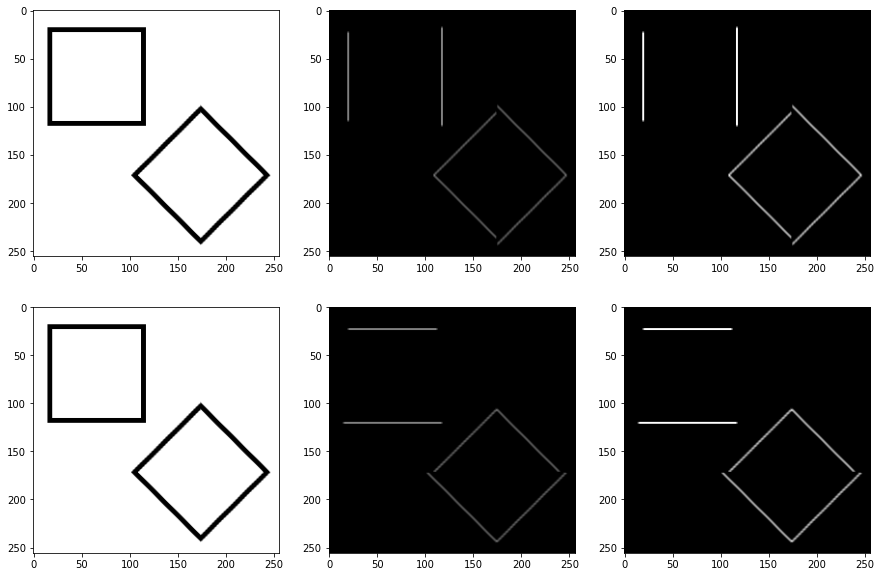

In [13]:
img = cv2.imread('kw.png', cv2.IMREAD_GRAYSCALE)

# Kernel
P1 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
P2 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

# +128 norm 
dst1 = cv2.filter2D(img,-1,P1/6)
dst2 = cv2.filter2D(img,-1,P2/6)
dst1add128 = abs(dst1)
dst2add128 = abs(dst2)

# Abs norm
dst1 = cv2.filter2D(img,-1,P1/3)
dst2 = cv2.filter2D(img,-1,P2/3)
dst1abs = abs(dst1)
dst2abs = abs(dst2)

# Plot
fig, axes = plt.subplots(2,3, figsize=(15, 10))
axes[0][0].imshow(img, 'gray', vmin=0, vmax=255)
axes[0][1].imshow(dst1add128, 'gray', vmin=0, vmax=255)
axes[0][2].imshow(dst1abs, 'gray', vmin=0, vmax=255)
axes[1][0].imshow(img, 'gray', vmin=0, vmax=255)
axes[1][1].imshow(dst2add128, 'gray', vmin=0, vmax=255)
axes[1][2].imshow(dst2abs, 'gray', vmin=0, vmax=255)
plt.show()

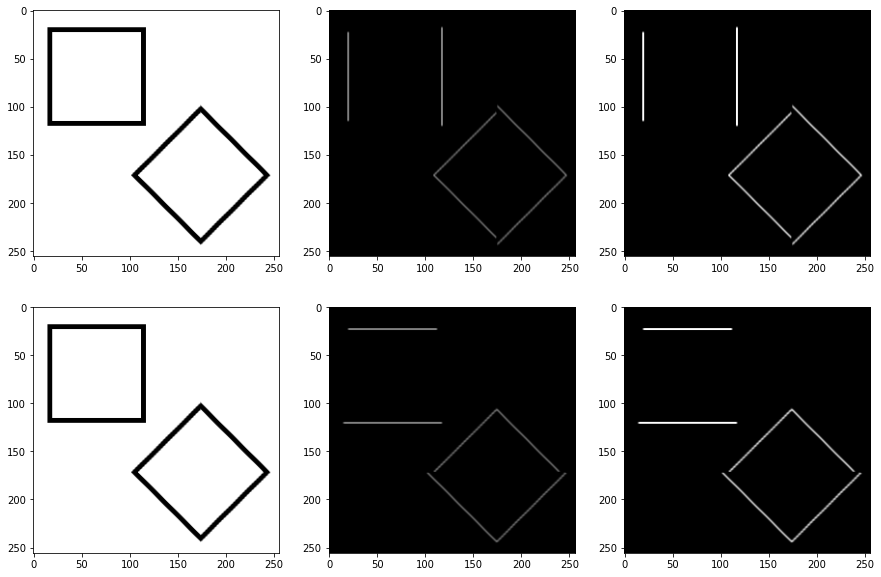

In [14]:
img = cv2.imread('kw.png', cv2.IMREAD_GRAYSCALE)

# Kernel
S1 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
S2 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

# +128 norm 
dst1 = cv2.filter2D(img,-1,S1/8)
dst2 = cv2.filter2D(img,-1,S2/8)
dst1add128 = abs(dst1)
dst2add128 = abs(dst2)

# Abs norm
dst1 = cv2.filter2D(img,-1,S1/4)
dst2 = cv2.filter2D(img,-1,S2/4)
dst1abs = abs(dst1)
dst2abs = abs(dst2)

# Plot
fig, axes = plt.subplots(2,3, figsize=(15, 10))
axes[0][0].imshow(img, 'gray', vmin=0, vmax=255)
axes[0][1].imshow(dst1add128, 'gray', vmin=0, vmax=255)
axes[0][2].imshow(dst1abs, 'gray', vmin=0, vmax=255)
axes[1][0].imshow(img, 'gray', vmin=0, vmax=255)
axes[1][1].imshow(dst2add128, 'gray', vmin=0, vmax=255)
axes[1][2].imshow(dst2abs, 'gray', vmin=0, vmax=255)
plt.show()

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



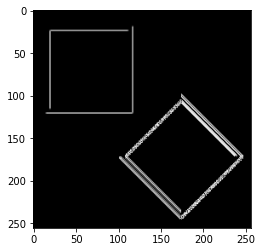

In [15]:
O = cv2.imread('kw.png', cv2.IMREAD_GRAYSCALE)

OS1 = cv2.filter2D(O,-1,S1/17**0.5)**2
OS2 = cv2.filter2D(O,-1,S2/17**0.5)**2
OW = (OS1+OS2)**0.5

plt.imshow(OW, 'gray')
plt.show()

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

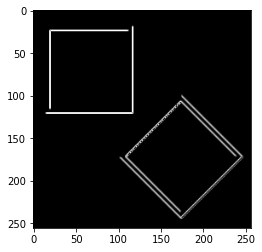

In [16]:
O = cv2.imread('kw.png', cv2.IMREAD_GRAYSCALE)

OS1 = cv2.filter2D(O,-1,S1/4)
OS2 = cv2.filter2D(O,-1,S2/4)
OW = abs(OS1+OS2)/2

plt.imshow(OW, 'gray')
plt.show()

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

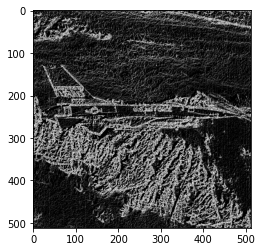

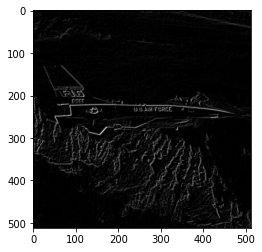

In [17]:
O = cv2.imread('jet.png', cv2.IMREAD_GRAYSCALE)

OS1 = cv2.filter2D(O,-1,S1/17**0.5)**2
OS2 = cv2.filter2D(O,-1,S2/17**0.5)**2
OW = (OS1+OS2)**0.5

plt.imshow(OW, 'gray')
plt.show()

OS1 = cv2.filter2D(O,-1,S1/4)
OS2 = cv2.filter2D(O,-1,S2/4)
OW = abs(OS1+OS2)/2

plt.imshow(OW, 'gray')
plt.show()